In [1]:
from google.colab import files

uploaded = files.upload()


Saving Alzheimer Dataset.zip to Alzheimer Dataset.zip


In [3]:
import zipfile
import os

zip_path = "Alzheimer Dataset.zip"  # or whatever your zip is named
extract_path = "/content/AlzheimerMRI"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Optional: Check the folder structure
os.listdir(extract_path)


['Alzheimer_s Dataset']

In [4]:
import os

base_path = "/content/AlzheimerMRI/Alzheimer_s Dataset"

for root, dirs, files in os.walk(base_path):
    print("📁 Current Directory:", root)
    print("🔹 Subfolders:", dirs)
    print("📄 Files:", files)
    break  # only show one level deep


📁 Current Directory: /content/AlzheimerMRI/Alzheimer_s Dataset
🔹 Subfolders: ['test', 'train']
📄 Files: []


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Epoch 1/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 260ms/step - accuracy: 0.4575 - loss: 1.1480 - val_accuracy: 0.5005 - val_loss: 1.0299 - learning_rate: 0.0010
Epoch 2/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 264ms/step - accuracy: 0.4859 - loss: 1.0527 - val_accuracy: 0.5024 - val_loss: 1.0133 - learning_rate: 0.0010
Epoch 3/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 225ms/step - accuracy: 0.5112 - loss: 0.9962 - val_accuracy: 0.5562 - val_loss: 0.9722 - learning_rate: 0.0010
Epoch 4/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 30s 230ms/step - accuracy: 0.5139 - loss: 0.9838 - val_accuracy: 0.5630 - val_loss: 0.9370 - learning_rate: 0.0010
Epoch 5/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 224ms/step - accuracy: 0.5454 - loss: 0.9344 - val_accuracy: 0.4692 - val_loss: 1.0104 - learning_rate: 0.0010
Epoch 6/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 263ms/step - accuracy: 0.5611 - loss: 0.9328 - val_accu

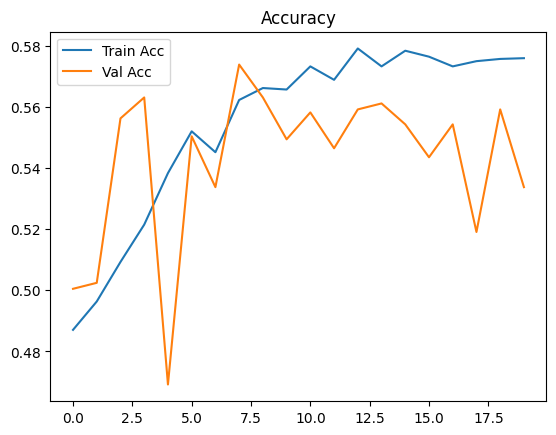

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Base paths
base_path = '/content/AlzheimerMRI/Alzheimer_s Dataset/'
train_dir = os.path.join(base_path, 'train')
test_dir = os.path.join(base_path, 'test')

# Image size and batch
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3)

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop, reduce_lr]
)

# Evaluate
loss, accuracy = model.evaluate(test_generator)
print(f"🧪 Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy*100:.2f}%")

# Plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")
plt.show()


In [14]:
model.save("alzheimer_model_mobilenetv2.h5")
